In [18]:
import os
import sys
import json
import glob
import shutil
import pickle
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
from plotly.subplots import make_subplots

# Load data and Pre-process

In [19]:
new_path = "/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/vizwiz_data/val.json"
with open(new_path) as data_file:
  data = data_file.read()
  data_content = json.loads(data)

In [20]:
vizwiz_df = pd.DataFrame(data_content['images'])
vizwiz_df.head()

,file_name,vizwiz_url,id,text_detected
0,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True
1,VizWiz_val_00000001.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23432,True
2,VizWiz_val_00000002.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23433,True
3,VizWiz_val_00000003.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23434,True
4,VizWiz_val_00000004.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23435,True


### Write the captions of each image to corresponding txt file using the image name. 

In [21]:
vizwiz_captions = pd.DataFrame(data_content['annotations'])
vizwiz_captions.head()

,caption,image_id,is_precanned,is_rejected,id,text_detected
0,A computer screen shows a repair prompt on the...,23431,False,False,117155,True
1,a computer screen with a repair automatically ...,23431,False,False,117156,True
2,partial computer screen showing the need of re...,23431,False,False,117157,True
3,Part of a computer monitor showing a computer ...,23431,False,False,117158,True
4,The top of a laptop with a blue background and...,23431,False,False,117159,True


In [24]:
#merge captions and images
vizwiz_cap_img_df = pd.merge(vizwiz_df, vizwiz_captions, left_on='id', right_on='image_id')
vizwiz_cap_img_df.head()

,file_name,vizwiz_url,id_x,text_detected_x,caption,image_id,is_precanned,is_rejected,id_y,text_detected_y
0,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True,A computer screen shows a repair prompt on the...,23431,False,False,117155,True
1,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True,a computer screen with a repair automatically ...,23431,False,False,117156,True
2,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True,partial computer screen showing the need of re...,23431,False,False,117157,True
3,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True,Part of a computer monitor showing a computer ...,23431,False,False,117158,True
4,VizWiz_val_00000000.jpg,https://ivc.ischool.utexas.edu/VizWiz_visualiz...,23431,True,The top of a laptop with a blue background and...,23431,False,False,117159,True


In [25]:
#get file name
vizwiz_cap_img_df['txt_filename'] = vizwiz_cap_img_df['file_name'].apply(lambda x: x.split('.')[0])

In [26]:
#get all unique ID as list
unqiueID = vizwiz_cap_img_df.id_x.unique()
listOfID = unqiueID.tolist()

In [11]:
for i in listOfID:
    #get details for image i
    new_df = vizwiz_cap_img_df[vizwiz_cap_img_df['id_x'] == i]
    #get file name
    file_name = new_df['text_name'].iloc[0]
    #write path
    writePath = '/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/text/' + file_name + '.txt'
    #store captions as list of item
    new_df_list = list(new_df['caption'])
    #write to text file using caption and file name
    with open(writePath, 'a') as f:
        f.write("\n".join(new_df_list))
        
        #for item in new_df_list:`
          #f.write("%s\n" % item)

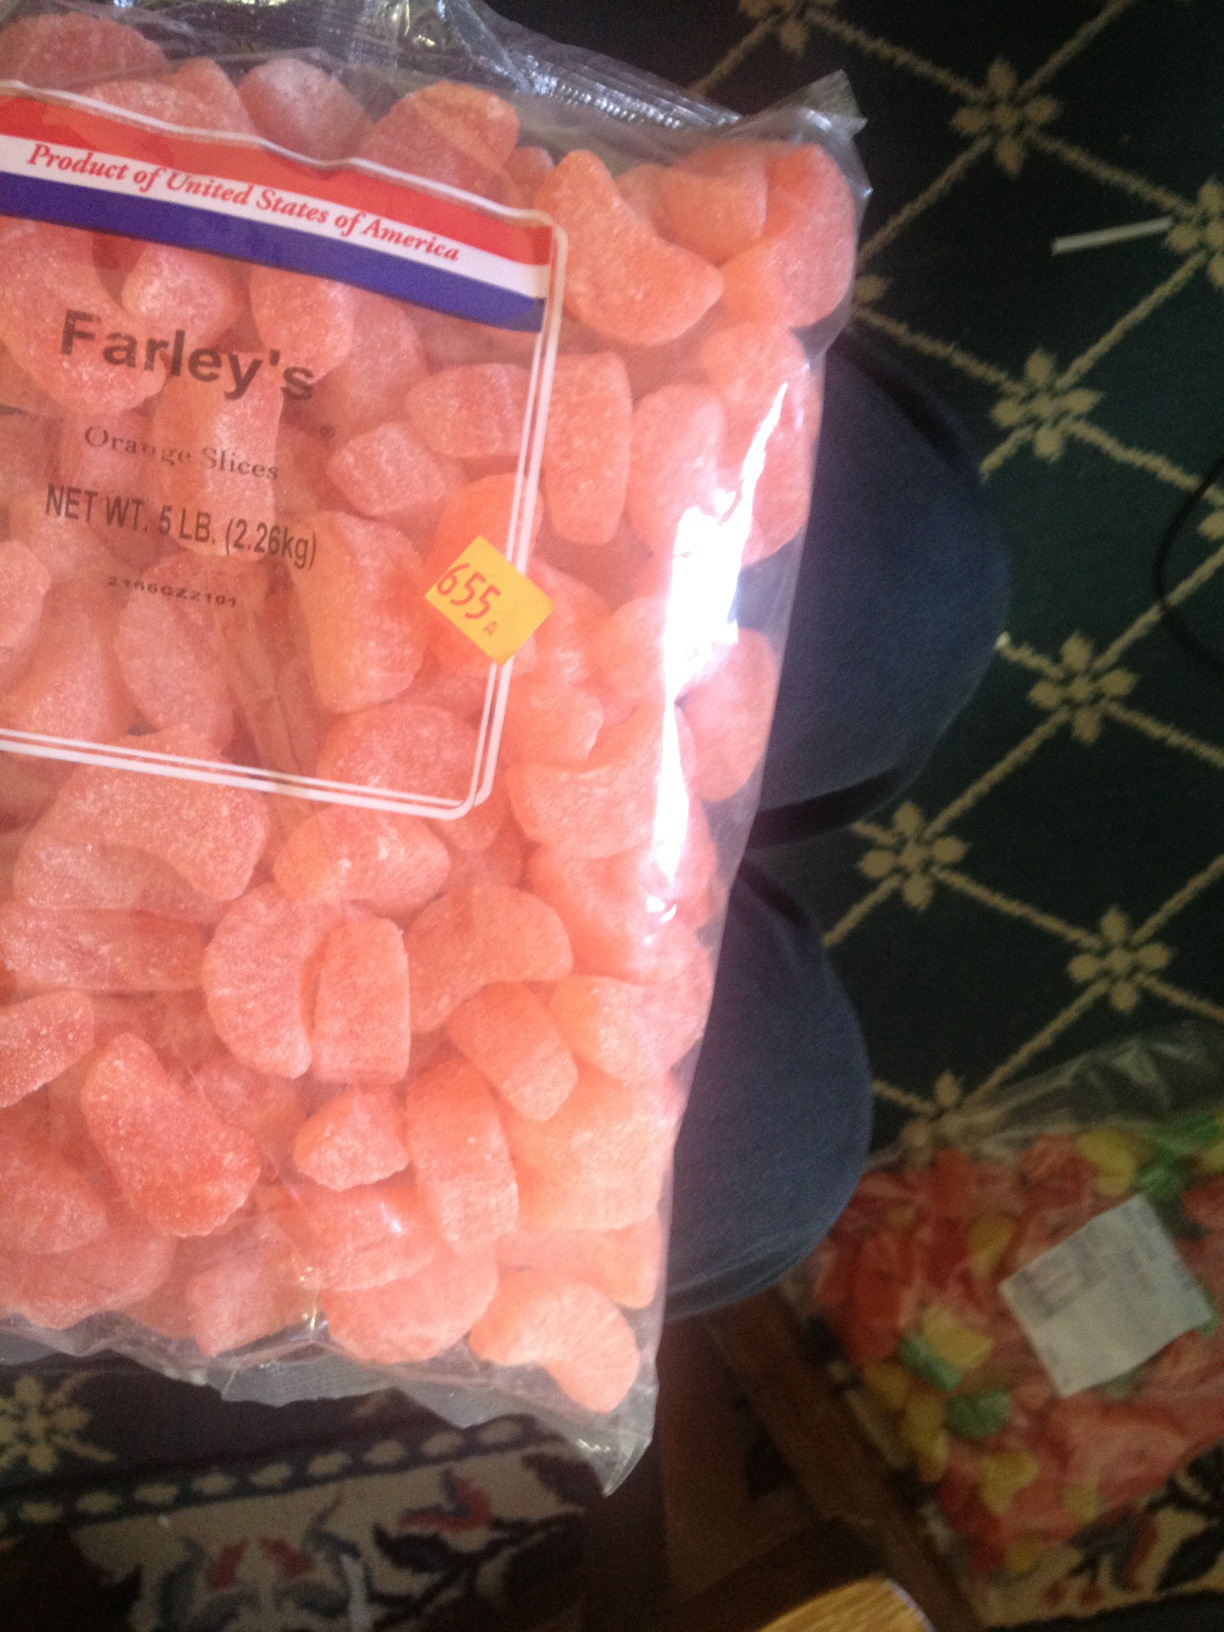

In [148]:
#sample image
img = Image.open('/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/images/VizWiz_train_00000008.jpg')
img

In [25]:
#caption for the above image
with open('/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/text/VizWiz_train_00000008.txt', "r") as f:
    captions = f.read().split('\n')

In [26]:
captions

['candy with pink color to eat and enjoy and text appear on the package',
 'a yellow color cheese is packed in a transparent nylon',
 "a sachet packaged of Farley' s Orange Slices",
 'Tasty, orange, jelly candies are in this bag.',
 "Plastic bag of Farley's brand orange slice candies."]

### Delete Quality Issue Picture

In [29]:
#select number of images with the following caption: 'Quality issues are too severe to recognize visual content.'
poor_images_train = []
for item in data_content['annotations']:
  if item['caption'] == 'Quality issues are too severe to recognize visual content.':
    poor_images_train.append(item['image_id'])

In [30]:
#total number of quality issue captions
len(poor_images_train)

5167

In [50]:
#number of images affected
len(set(poor_images_train))

2528

In [32]:
#select the imges as list of items
images_id_set= set(poor_images_train)
images_id_list = list(images_id_set)

In [33]:
len(images_id_list)

2528

In [53]:
# get name of all affected images (this cell can be used to remove both images and txt files)
poor_images_train_name = []
for item in data_content['images']:
  if item['id'] in images_id_list:
    file_name = item['file_name']
    poor_images_train_name.append('/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/images/'+file_name)

In [56]:
len(poor_images_train_name)

2528

In [55]:
# delete the selected items from data
for f in poor_images_train_name:
    os.remove(f)

Stats for removed Text

Total text files: 31181 <br> 
Deleted files for train: 7680 <br> 
Remained: 23501

Deleted files for val: 2528 <br> 
Remained: 20973

' '

Stats for removed Images

Total text files: 31704 <br> 
Deleted files for train: 7680 <br> 
Remained: 24024

Deleted files for val: 2528 <br> 
Remained: 21496

### Store file name as .pkl file

In [34]:
# repeat all section in this cell for train and val (change the direcotry name as required)
items= []
for i in data_content['annotations']:
    items.append(i['image_id'])

In [36]:
#select quality issue images
items_keep = []
for i in data_content['annotations']:
    if i['caption'] == 'Quality issues are too severe to recognize visual content.':
        items_keep.append(i['image_id'])

In [91]:
file_names = []
for i in data_content['images']:
    if i['id'] in items_keep:
        continue
    else:
        file_names.append(i['file_name'].split('.')[0])

In [94]:
#dump file name as pickle files
with open('/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/train/filenames.pickle', 'wb') as f:
  pickle.dump(file_names, f)

In [40]:
#test
train_filename_pickle = pd.read_pickle(r'/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/train/filenames.pickle')
train_filename_pickle[1:10]

['VizWiz_train_00000002',
 'VizWiz_train_00000003',
 'VizWiz_train_00000004',
 'VizWiz_train_00000006',
 'VizWiz_train_00000007',
 'VizWiz_train_00000008',
 'VizWiz_train_00000009',
 'VizWiz_train_00000010',
 'VizWiz_train_00000011']

### Captions to token

In [167]:
# The below code is from ManiGAN repository (https://github.com/mrlibw/ManiGAN)
def load_captions(data_dir, filenames):
    all_captions = []
    for i in range(len(filenames)):
        cap_path = '%s/text/%s.txt' % (data_dir, filenames[i])
        with open(cap_path, "r") as f:
            captions = f.read().split('\n')
            cnt = 0
            for cap in captions:
                if len(cap) == 0:
                    continue
                cap = cap.replace("\ufffd\ufffd", " ")
                # picks out sequences of alphanumeric characters as tokens
                # and drops everything else
                tokenizer = RegexpTokenizer(r'\w+')
                tokens = tokenizer.tokenize(cap.lower())

                if len(tokens) == 0:
                    print('cap', cap)
                    continue

                tokens_new = []
                for t in tokens:
                    t = t.encode('ascii', 'ignore').decode('ascii')
                    if len(t) > 0:
                        tokens_new.append(t)
                all_captions.append(tokens_new)
                cnt += 1
                if cnt == 5:
                    break
            if cnt < 5:
                print('ERROR: the captions for %s less than %d'
                      % (filenames[i], cnt))
    return all_captions

In [168]:
data_dir = '/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/'
train_names = pd.read_pickle(r'/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/train/filenames.pickle')

In [169]:
#load captions
train_captions = load_captions(data_dir, train_names)

In [170]:
train_captions[1]

['a',
 'white',
 'bag',
 'is',
 'hanging',
 'from',
 'a',
 'door',
 'knob',
 'and',
 'is',
 'for',
 'motorsports']

In [171]:
data_dir = '/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/'
test_names = pd.read_pickle(r'/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/test/filenames.pickle')

In [172]:
test_captions = load_captions(data_dir, test_names)

In [173]:
test_captions[5]

['a',
 'bag',
 'of',
 'generic',
 'store',
 'brand',
 'granulated',
 'sugar',
 'on',
 'a',
 'kitchen',
 'counter']

In [174]:
# The below code is from ManiGAN repository (https://github.com/mrlibw/ManiGAN)
def build_dictionary(train_captions, test_captions):
    word_counts = defaultdict(float)
    captions = train_captions + test_captions
    for sent in captions:
        for word in sent:
            word_counts[word] += 1

    vocab = [w for w in word_counts if word_counts[w] >= 0]

    ixtoword = {}
    ixtoword[0] = '<end>'
    wordtoix = {}
    wordtoix['<end>'] = 0
    ix = 1
    for w in vocab:
        wordtoix[w] = ix
        ixtoword[ix] = w
        ix += 1

    train_captions_new = []
    for t in train_captions:
        rev = []
        for w in t:
            if w in wordtoix:
                rev.append(wordtoix[w])
        # rev.append(0)  # do not need '<end>' token
        # this train_captions_new hold index of each word in sentence
        train_captions_new.append(rev)

    test_captions_new = []
    for t in test_captions:
        rev = []
        for w in t:
            if w in wordtoix:
                rev.append(wordtoix[w])
        # rev.append(0)  # do not need '<end>' token
        test_captions_new.append(rev)

    return [train_captions_new, test_captions_new,
            ixtoword, wordtoix, len(ixtoword)]

In [175]:
train_captions, test_captions, ixtoword, wordtoix, n_words = build_dictionary(train_captions, test_captions)

In [179]:
filepath = '/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/captions.pickle'

In [180]:
#export captions as pkl file
with open(filepath, 'wb') as f:
    pickle.dump([train_captions, test_captions,
                 ixtoword, wordtoix], f, protocol=2)
    print('Save to: ', filepath)

Save to:  /Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/captions.pickle


# Reduce Data Size

In [27]:
#intial train file size
train_filename_pickle = pd.read_pickle(r'/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/train/filenames.pickle')
len(train_filename_pickle)

15751

In [33]:
#get all file path for images
def load_images(folder):
    images = []
    
    for jpgfile in glob.iglob(os.path.join(folder, "*.jpg")):
        images.append(jpgfile)
    return images

#get size of each image
def load_image_size(images):
    image_sizes = []
    for item in images:
        img = Image.open(item)
        image_sizes.append(img.size)
    return image_sizes

In [36]:
folder = "/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/images"
images_filepath = load_images(folder)

In [39]:
#test
images_filepath[1:5]

['/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/images/VizWiz_train_00005669.jpg',
 '/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/images/VizWiz_val_00007580.jpg',
 '/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/images/VizWiz_train_00002106.jpg',
 '/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/images/VizWiz_val_00006846.jpg']

In [40]:
size_of_images = load_image_size(images_filepath)

In [41]:
#get all different sizes
size_of_images_set = set(size_of_images)

#convert back to list to order by size
size_of_images_list = list(size_of_images_set)
size_of_images_list.sort()

In [42]:
#display top 5 biggest images
size_of_images_list[-5:]

[(1296, 968), (1596, 177), (1632, 1224), (2048, 1536), (2592, 1936)]

### Get better images

In [133]:
def copy_images_under_size(src_dir, training_pkl):
    new_training_names = []
    
    for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
        
        #open image and get size
        img = Image.open(jpgfile)
        img_width, img_height = img.size
        
        #file name
        file_name = jpgfile.split('/')[8].split('.')[0]
        
        if abs(img_width - img_height) < 123 and file_name in training_pkl:
            new_training_names.append(file_name)
    return new_training_names

Train

In [97]:
#source and destination directory
src_dir = "/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/images"
train_file_names = pd.read_pickle(r'/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/train/filenames.pickle')

In [98]:
new_train_file_names = copy_images_under_size(src_dir, train_file_names)

In [99]:
len(new_train_file_names)

1789

In [100]:
#dump file name as pickle files
with open('/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/train/filenames.pickle', 'wb') as f:
  pickle.dump(new_train_file_names[:1500], f)

Test

In [134]:
#source and destination directory
src_dir = "/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/images"
test_file_names = pd.read_pickle(r'/Users/vithurshan/Desktop/ManiGAN-VizWiz/data/vizwiz/test/filenames.pickle')

In [135]:
new_test_file_names = copy_images_under_size(src_dir, test_file_names)

In [136]:
len(new_test_file_names)

443

In [137]:
#dump file name as pickle files
with open('/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/test/filenames.pickle', 'wb') as f:
  pickle.dump(new_test_file_names[:150], f)

# Final Test Images

In [138]:
test_filename_pickle = pd.read_pickle(r'/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/test/filenames.pickle')

In [143]:
#copy over test images for selection
def get_test_images(src_dir, dst_dir):
    for jpgfile in glob.iglob(os.path.join(src_dir, "*.jpg")):
        img_name = jpgfile.split('/')[8].split('.')[0]
        if img_name in test_filename_pickle:
            shutil.copy(jpgfile, dst_dir)

In [144]:
src_dir = "/Users/vithurshan/Desktop/VizWizSmall/data/vizwiz/images"
dst_dir = "/Users/vithurshan/Desktop/VizWizSmall/FinalTesting"

In [145]:
get_test_images(src_dir,dst_dir)

# Manual Text Captions

In [182]:
dst_dir = "/Users/vithurshan/Desktop/VizWizSmall/FinalTesting"

In [183]:
save_path = '/Users/vithurshan/Desktop/VizWizSmall/FinalTesting/DetailedText'
save_path1 = '/Users/vithurshan/Desktop/VizWizSmall/FinalTesting/Text'

for jpgfile in glob.iglob(os.path.join(dst_dir, "*.jpg")):
    name_of_file = jpgfile.split('/')[6].split('.')[0]
    
    completeName = os.path.join(save_path, name_of_file+".txt")
    file1 = open(completeName, "w")
    toFile = input(name_of_file + " Detailed Text ")
    file1.write(toFile)
    file1.close()
    
    completeName1 = os.path.join(save_path1, name_of_file+".txt")
    file2 = open(completeName1, "w")
    toFile = input(name_of_file + " Short text ")
    file2.write(toFile)
    file2.close()

VizWiz_val_00004937 Detailed Text Large blue tub of coffee with black lid.
VizWiz_val_00004937 Short text Tub, blue.
VizWiz_val_00003269 Detailed Text A large white dog lying on a tile floor
VizWiz_val_00003269 Short text Dog, white.
VizWiz_val_00001522 Detailed Text This hallway has red lockers.
VizWiz_val_00001522 Short text Lockers, red.
VizWiz_val_00004843 Detailed Text A can of soda is on the floor. 
VizWiz_val_00004843 Short text Table, floor.
VizWiz_val_00002598 Detailed Text The playing cards box has red writings.
VizWiz_val_00002598 Short text Label, red. 
VizWiz_val_00000601 Detailed Text Change the green grass to brown sand.
VizWiz_val_00000601 Short text Grass, sand.
VizWiz_val_00007191 Detailed Text A package of oatmeal to go that is yellow and black.
VizWiz_val_00007191 Short text Package, yellow and black.
VizWiz_val_00005631 Detailed Text Remote control is on grass.
VizWiz_val_00005631 Short text Sureface, grass.
VizWiz_val_00003297 Detailed Text This dollar bill is dir

In [184]:
file_names = []
for jpgfile in glob.iglob(os.path.join(dst_dir, "*.jpg")):
    name_of_file = jpgfile.split('/')[6].split('.')[0]
    file_names.append(name_of_file)

In [185]:
len(file_names)

25

In [186]:
with open('/Users/vithurshan/Desktop/VizWizSmall/FinalTesting/example_filenames.txt', 'w') as f:
    for item in file_names:
        f.write("%s\n" % item)